In [1]:
import numpy as np

In [2]:
from cgpm2.sample_crosscat import generate_random_ast
from cgpm2.sample_crosscat import compile_ast_to_core_dsl
from cgpm2.sample_crosscat import compile_core_dsl_to_embedded_dsl
from cgpm2.sample_crosscat import parse_core_dsl_to_ast

[((('crp', None), {'alpha': 0.220725}), [(0, ('normal', None), {'s': 3.066012, 'r': 1.156326, 'm': 0.092488, 'nu': 0.003956})]), ((('crp', None), {'alpha': 1.42933}), [(1, ('normal', None), {'s': 0.948107, 'r': 1.674622, 'm': 0.717834, 'nu': 1.279254}), (4, ('categorical', {'k': 10}), {'alpha': 0.782075})]), ((('crp', None), {'alpha': 0.185259}), [(2, ('poisson', None), {'a': 0.345136, 'b': 2.498285}), (3, ('categorical', {'k': 3}), {'alpha': 1.253779})])]
- view:
    row clustering model:
      - crp:
          distargs:
          hypers:
            alpha: 0.2207
    distribution models:
      - normal{0}:
          distargs:
          hypers:
            s: 3.0660
            r: 1.1563
            m: 0.0925
            nu: 0.0040
- view:
    row clustering model:
      - crp:
          distargs:
          hypers:
            alpha: 1.4293
    distribution models:
      - normal{1}:
          distargs:
          hypers:
            s: 0.9481
            r: 1.6746
            m: 0.717

In [3]:
prng = np.random.RandomState(10)

In [4]:
distributions = [
    ('normal', None),
    ('normal', None),
    ('poisson', None),
    ('categorical', {'k':3}),
    ('categorical', {'k':10}),
]

In [5]:
ast = generate_random_ast(distributions, prng)
ast

[((('crp', None), {'alpha': 0.220725}),
  [(0,
    ('normal', None),
    {'m': 0.092488, 'nu': 0.003956, 'r': 1.156326, 's': 3.066012})]),
 ((('crp', None), {'alpha': 1.42933}),
  [(1,
    ('normal', None),
    {'m': 0.717834, 'nu': 1.279254, 'r': 1.674622, 's': 0.948107}),
   (4, ('categorical', {'k': 10}), {'alpha': 0.782075})]),
 ((('crp', None), {'alpha': 0.185259}),
  [(2, ('poisson', None), {'a': 0.345136, 'b': 2.498285}),
   (3, ('categorical', {'k': 3}), {'alpha': 1.253779})])]

In [6]:
core_dsl = compile_ast_to_core_dsl(ast)
print core_dsl.getvalue()

- view:
    row clustering model:
      - crp:
          distargs:
          hypers:
            alpha: 0.2207
    distribution models:
      - normal{0}:
          distargs:
          hypers:
            s: 3.0660
            r: 1.1563
            m: 0.0925
            nu: 0.0040
- view:
    row clustering model:
      - crp:
          distargs:
          hypers:
            alpha: 1.4293
    distribution models:
      - normal{1}:
          distargs:
          hypers:
            s: 0.9481
            r: 1.6746
            m: 0.7178
            nu: 1.2793
      - categorical{4}:
          distargs:
            k: 10
          hypers:
            alpha: 0.7821
- view:
    row clustering model:
      - crp:
          distargs:
          hypers:
            alpha: 0.1853
    distribution models:
      - poisson{2}:
          distargs:
          hypers:
            a: 0.3451
            b: 2.4983
      - categorical{3}:
          distargs:
            k: 3
          hypers:
            a

In [7]:
embedded_dsl = compile_core_dsl_to_embedded_dsl(core_dsl.getvalue())
print embedded_dsl.getvalue()

from cgpm2.categorical import Categorical
from cgpm2.crp import CRP
from cgpm2.flexible_rowmix import FlexibleRowMixture
from cgpm2.normal import Normal
from cgpm2.poisson import Poisson
from cgpm2.product import Product

view0 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[100003], inputs=[], hypers={'alpha': 0.2207},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[0], inputs=[], hypers={'s': 3.066, 'r': 1.1563, 'm': 0.0925, 'nu': 0.004},),])
)
view1 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[100004], inputs=[], hypers={'alpha': 1.4293},),
  cgpm_components_base=Product(cgpms=[
    Normal(outputs=[1], inputs=[], hypers={'s': 0.9481, 'r': 1.6746, 'm': 0.7178, 'nu': 1.2793},),
    Categorical(outputs=[4], inputs=[], distargs={'k': 10}, hypers={'alpha': 0.7821},),])
)
view2 = FlexibleRowMixture(
  cgpm_row_divide=CRP(outputs=[100005], inputs=[], hypers={'alpha': 0.1853},),
  cgpm_components_base=Product(cgpms=[
    Poisson(outputs=[2], inputs=[], hypers={'a':

In [8]:
exec(embedded_dsl.getvalue())

In [9]:
crosscat

In [10]:
crosscat.incorporate(1, {0:0.4, 1:2.5, 2:1, 3:2, 4:8})

In [11]:
crosscat.render()

['Product',
 ['cgpms=',
  [['FlexibleRowMixture',
    ['cgpm_row_divide=',
     ['Crp',
      ['outputs=', [100003]],
      ['inputs=', []],
      ['distargs=', {}],
      ['params=', {}],
      ['hypers=', {'alpha': 0.2207}],
      ['suffstats=', {'N': 1, 'counts': [1]}]]],
    ['cgpm_components=',
     ['FlexibleArray',
      ['outputs=', [0]],
      ['inputs=', [100003]],
      ['cgpms=',
       [(0,
         ['Product',
          ['cgpms=',
           [['Normal',
             ['outputs=', [0]],
             ['inputs=', []],
             ['distargs=', {}],
             ['params=', {}],
             ['hypers=', {'m': 0.0925, 'nu': 0.004, 'r': 1.1563, 's': 3.066}],
             ['suffstats=',
              {'N': 1.0,
               'sum_x': 0.4,
               'sum_x_sq': 0.16000000000000003}]]]]])]]]]],
   ['FlexibleRowMixture',
    ['cgpm_row_divide=',
     ['Crp',
      ['outputs=', [100004]],
      ['inputs=', []],
      ['distargs=', {}],
      ['params=', {}],
      ['hypers=', 

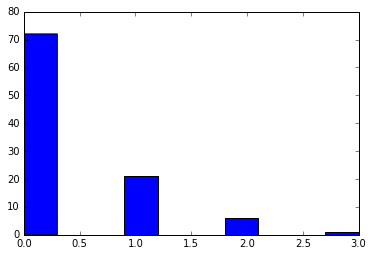

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
samples = crosscat.simulate(None, [1,2], N=100)
plt.hist([s[2] for s in samples]);